<a href="https://colab.research.google.com/github/Agrico1/Data-Analyst/blob/main/Analisis_Data_Analy_Job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries dan Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Belajar Data Analyst/Coba Project/DataAnalyst.csv')

In [4]:
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


Data Berisi job title , salary estimation , job description , rating ,company name , location Dan Lain-lain

# Data Cleaning

In [5]:
# Mengecek missing data pada seluruh DataFrame
missing_data = data.isnull().sum()

# Menampilkan jumlah missing data untuk setiap kolom
print(missing_data)


Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


Setelah di cek hanya Company Name yang memiliki data kosong


In [6]:
data['Company Name'].value_counts()

Company Name
Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
                                         ..
Empire Today\n3.7                         1
Numerator\n3.9                            1
BDP International\n3.0                    1
Ferrara Candy Company\n3.5                1
SCL Health\n3.4                           1
Name: count, Length: 1513, dtype: int64

In [7]:
data['Easy Apply'].value_counts()

Easy Apply
-1      2173
True      80
Name: count, dtype: int64

In [8]:
data['Competitors'].value_counts()

Competitors
-1                                                                 1732
Robert Half, Insight Global                                          14
Adecco, Manpower                                                     14
Artech Information Systems, Mindlance, Tech Mahindra                 10
Google, Microsoft, Samsung Electronics                               10
                                                                   ... 
Carr Riggs & Ingram, Cherry Bekaert, LBMC                             1
Transnational Foods, One Source Distributors                          1
GE                                                                    1
Fiserv, First Data, Jack Henry & Associates                           1
Centura Health, HealthONE, Denver Health and Hospital Authority       1
Name: count, Length: 291, dtype: int64

In [9]:
data['Rating'].value_counts()

Rating
-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 1.0     10
 2.4     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.7      2
 1.8      2
 1.6      2
 1.9      2
Name: count, dtype: int64

Setelah di cek lagi saya lihat ada data bernilai -1 saya rasa -1 ini di maksud dengan kosong (null) maka dari itu akan saya hapus

In [10]:
# Mengganti -1, -1.0, '-1' dengan nan
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [11]:
# Mengecek missing data pada seluruh DataFrame
missing_data = data.isnull().sum()

# Menampilkan jumlah missing data untuk setiap kolom
print(missing_data)

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64


Bisa Dilihat terdapat banyak missing values di dalam dataset. 'Easy Apply' dan 'Competitors' memiliki mising value paling banyak.

In [12]:
# Unnamed: 0 Datanya tidak terpakai
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [13]:
data.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN


In [14]:
data['Company Name'] = data['Company Name'].str.extract(r'^(.*)(?:\n|$)')


In [15]:
data['Company Name']

0                Vera Institute of Justice
1       Visiting Nurse Service of New York
2                              Squarespace
3                                 Celerity
4                                  FanDuel
                       ...                
2248                         Avacend, Inc.
2249                     Arrow Electronics
2250                              Spiceorb
2251           Contingent Network Services
2252                            SCL Health
Name: Company Name, Length: 2253, dtype: object

In [16]:
data[['Job Title', 'Department']] = data['Job Title'].str.split(',', n=1, expand=True)


In [17]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,None
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations]
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,None
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,None
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,None
2250,Technical Business Analyst (SQL,$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data analytics, ETL)"
2251,Data Analyst 3,$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,Customer Experience


In [18]:
data['Job Description'] = data['Job Description'].str.extract(r'^(.*)(?:\n|$)')

In [19]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,None
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations]
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,None
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,None
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,None
2250,Technical Business Analyst (SQL,$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data analytics, ETL)"
2251,Data Analyst 3,$78K-$104K (Glassdoor est.),Summary,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,Customer Experience


In [20]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [21]:
data.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,False,None
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,Insights & Analytics Team [Customer Operations]
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,False,None
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,None


In [22]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

<ipython-input-23-022029b8c91f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(
<ipython-input-23-022029b8c91f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart=chart.set_xticklabels(


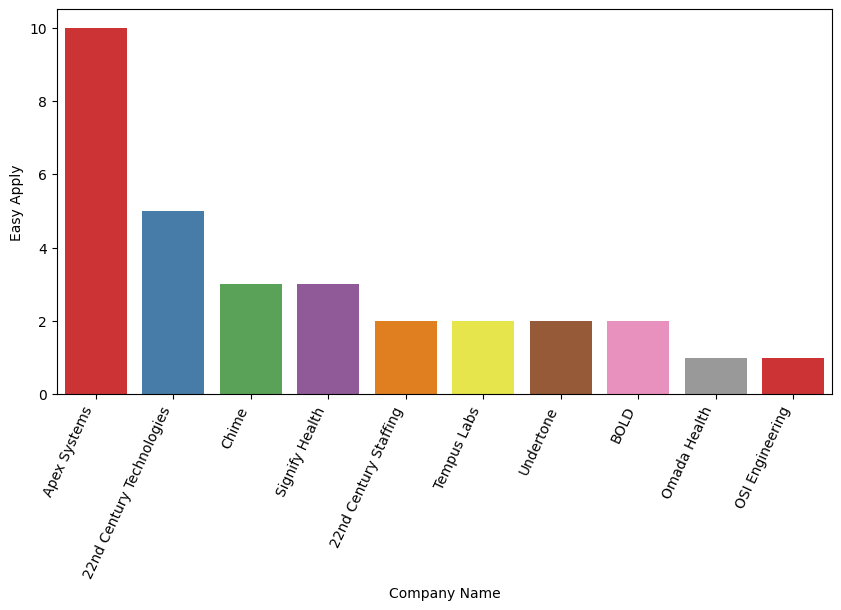

In [23]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',


)

**Dapat di lihat ada top 10 perusahan yang mencari posisi data analyst**

In [24]:
# Memisahkan kolom "Salary Estimate" menjadi dua kolom terpisah
data[['Salary Minimum', 'Salary Maximum']] = data['Salary Estimate'].str.split('-', expand=True)

# Menghapus karakter non-numerik dari kolom "Salary Minimum" dan "Salary Maximum"
data['Salary Minimum'] = data['Salary Minimum'].str.replace('[^\d.]', '', regex=True)
data['Salary Maximum'] = data['Salary Maximum'].str.replace('[^\d.]', '', regex=True)

# Menghapus karakter 'K' dari kolom "Salary Minimum" dan "Salary Maximum"
data['Salary Minimum'] = data['Salary Minimum'].str.rstrip('K')
data['Salary Maximum'] = data['Salary Maximum'].str.rstrip('K')

# Mengonversi ke tipe float
data['Salary Minimum'] = data['Salary Minimum'].astype(float)
data['Salary Maximum'] = data['Salary Maximum'].astype(float)

# Menampilkan hasil
print(data[['Salary Minimum', 'Salary Maximum']].head())


   Salary Minimum  Salary Maximum
0            37.0            66.0
1            37.0            66.0
2            37.0            66.0
3            37.0            66.0
4            37.0            66.0


In [25]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Salary Minimum,Salary Maximum
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37.0,66.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,False,None,37.0,66.0
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,Insights & Analytics Team [Customer Operations],37.0,66.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,False,None,37.0,66.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,None,37.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,False,None,78.0,104.0
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",False,None,78.0,104.0
2250,Technical Business Analyst (SQL,$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"Data analytics, ETL)",78.0,104.0
2251,Data Analyst 3,$78K-$104K (Glassdoor est.),Summary,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,False,Customer Experience,78.0,104.0


In [42]:
import plotly.graph_objects as go

# Misalkan Anda memiliki DataFrame df dengan index berisi nama kota
# dan kolom 'Min_Salary' dan 'Max_Salary' berisi nilai minimum dan maksimum
# salary untuk setiap kota

# Definisikan DataFrame df
df = data.groupby('Location')[['Salary Minimum', 'Salary Maximum']].mean().nlargest(10, 'Salary Minimum')

# Membuat figure
fig = go.Figure()

# Menambahkan trace untuk minimum salary
fig.add_trace(go.Bar(x=df.index, y=df['Salary Minimum'], name='Minimum Salary'))

# Menambahkan trace untuk maximum salary
fig.add_trace(go.Bar(x=df.index, y=df['Salary Maximum'], name='Maximum Salary'))

# Mengatur layout
fig.update_layout(title='Top 10 Kota dengan minimum dan maximum salary', barmode='stack')

# Menampilkan plot
fig.show()


In [43]:
df=data.groupby('Job Title')[['Salary Maximum','Salary Minimum']].mean().sort_values(['Salary Maximum','Salary Minimum'],ascending=False).head(10)

In [44]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Salary Minimum'],name='Minimum Salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Salary Maximum'],name='Maximum Salary'))

fig.update_layout(title='Top 10 Roles dengan minimum dan maximum salary',barmode='stack')

fig.show()

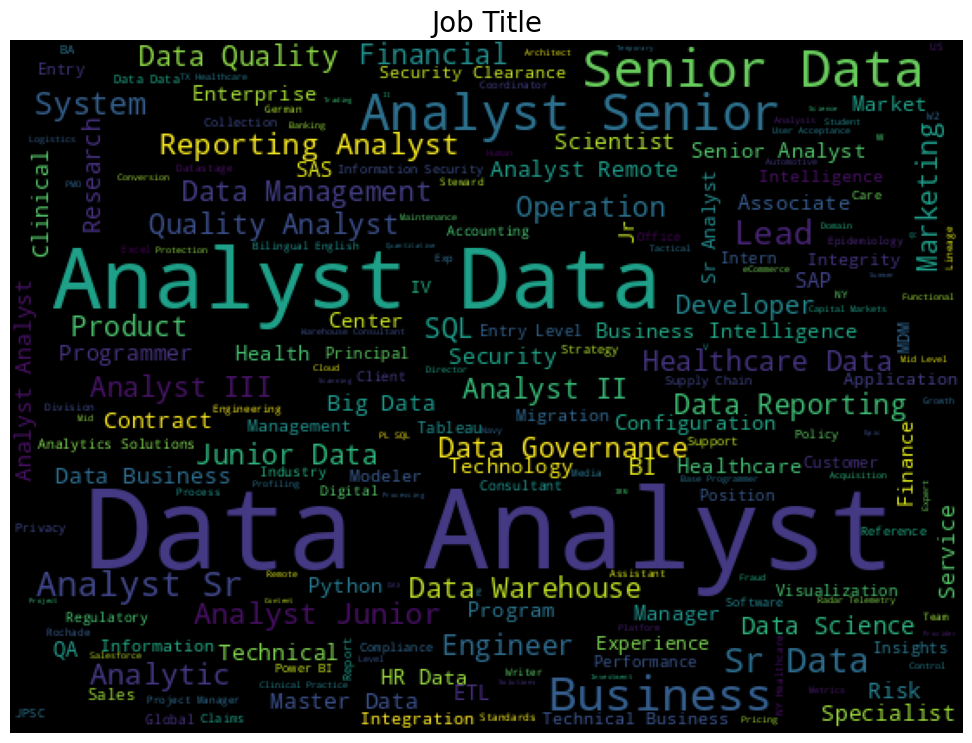

In [46]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=550,height= 400).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()